In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv("Titanic_train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering for train data

In [4]:
## in this data, name is not more useful for model building so we delete this 
train_df.drop('Name',axis=1,inplace=True)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling missing values

In [7]:
## in Age collumn there are 177 missing values out of 891 so for that we have to use median imputation 
median_age = train_df['Age'].median()
median_age

28.0

In [8]:
train_df['Age'] = train_df['Age'].fillna(median_age)

In [9]:
## in cabin column, there are approximately 70% missing values, it will not effiecient for us to impute so we delete this column
train_df.drop('Cabin',axis=1,inplace=True)
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
## Embarked is an categorical feature so we have to use mode imputation
mode = train_df['Embarked'].mode()[0]
mode

'S'

In [11]:
train_df['Embarked'] = train_df['Embarked'].fillna(mode)
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# in this ticket column is also not useful for us to build a model so we delete this too.
train_df.drop('Ticket',axis=1,inplace=True)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [14]:
## passengerid is also not important 
train_df.drop('PassengerId',axis=1,inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
train_df['Sex'] = train_df['Sex'].map({'male':1, 'female':0})

In [17]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [18]:
train_df['Embarked'] = train_df['Embarked'].map({'S':1, 'C':2, 'Q':3})

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [20]:
train_df['Age'] = train_df['Age'].astype(int)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 52.3 KB


In [22]:
train_df.to_csv("New_titanic_clean_data.csv")
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [23]:
x = train_df.iloc[:,1:]
y = train_df.iloc[:,:1]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [24]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,1
1,1,0,38,1,0,71.2833,2
2,3,0,26,0,0,7.9250,1
3,1,0,35,1,0,53.1000,1
4,3,1,35,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,1
887,1,0,19,0,0,30.0000,1
888,3,0,28,1,2,23.4500,1
889,1,1,26,0,0,30.0000,2


### Data Spliting And Model Building

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((712, 7), (712, 1), (179, 7), (179, 1))

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [28]:
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix

In [30]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[88, 12],
       [24, 55]], dtype=int64)

In [31]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.82      0.70      0.75        79

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Text(0, 0.5, 'True Positive Rate')

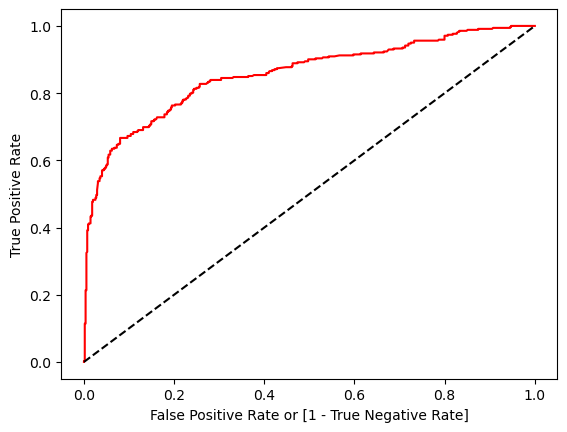

In [32]:
fpr,tpr,threshold = roc_curve(y, model.predict_proba (x)[:,1])
auc = roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr,color='red', label = 'logit model (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [33]:
auc

0.7881012658227848